Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Chretien Li"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

1. A = [1,5,6,2,3,4,7,8,9]
2. i = 5

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [5]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    # YOUR CODE HERE
    #we will set pivot as the last value of the array
    pivot = A[r]
    
    #default i to p-1
    i = p-1
    
    #if number we're evaluating is less than pivot, increase i by 1, and swap i-value and number
    #repeat this r number of times
    for j in range(p,r):
        if A[j] <= pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
    #swaps pivot and i+1
    A[i+1], A[r] = A[r], A[i+1]
    
    return i+1

In [6]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [9]:
def quick_sort(A,p,r):
    #follows pseudocode from Cormen et. al.
    if p<r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A, q+1, r)
    return A

In [10]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


Average time for same-values list:  0.07474694490432739 seconds
Average time for distinct-values:  0.07435471057891846 seconds


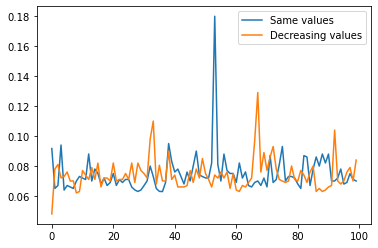

In [44]:
#import necessary modules
import time
from matplotlib import pyplot as plt

#create a list of just 1's
one_list = []
for one in range(1000):
    one_list.append(1)

#create list of decreasing values from 1000 to 1
decreasing_list = []
for i in range(1000, 0, -1):
    decreasing_list.append(i)

#empty lists to track time to sort
same_elements_array = []
distinct_elements = []

#general function that times 1 run of quicksort
def test_sort(lst):
    start = time.time()
    quick_sort(lst, 0, len(lst)-1)
    end = time.time()
    time_elapsed = end-start
    return time_elapsed
    
#count 100 times for sorting list of all 1's
for i in range(100):
    time_temp = test_sort(one_list)
    same_elements_array.append(time_temp)
    
print("Average time for same-values list: ", sum(same_elements_array)/len(same_elements_array), "seconds")

#count 100 times for sorting list of decreasing values
for j in range(100):
    time_temp_1 = test_sort(decreasing_list)
    distinct_elements.append(time_temp_1)

print("Average time for distinct-values: ", sum(distinct_elements)/len(distinct_elements), "seconds")

plt.plot(same_elements_array, label = "Same values")
plt.plot(distinct_elements, label = "Decreasing values")
plt.legend()
plt.show()